In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
clk_reg = pd.read_excel('Cement Clinker Data.xlsx')
clk_reg

,SO3,FCaO,AS,LS,SM,AM,C3S,C2S,C3A,C4AF,BMSO3,Blaine,R45,1D
0,0.63,1.57,1.14,91.94,2.33,1.36,48.83,26.77,7.74,12.25,2.95,319,18.10,28.4
1,0.78,1.90,0.91,92.48,2.33,1.36,48.75,26.46,7.68,12.16,2.82,322,16.80,29.6
2,0.81,2.04,0.88,92.84,2.36,1.37,49.20,26.07,7.64,11.95,2.77,315,18.90,31.3
3,0.80,1.85,0.89,92.63,2.35,1.37,49.50,25.99,7.64,12.04,2.74,315,18.10,32.4
4,0.76,1.70,0.98,92.83,2.30,1.37,50.15,25.15,7.82,12.19,2.74,319,17.39,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,1.66,1.90,0.39,93.25,2.36,1.30,50.61,24.23,7.06,12.19,2.63,315,19.00,30.8
318,1.62,1.68,0.39,93.67,2.39,1.34,52.65,22.75,7.23,11.83,2.57,317,21.80,30.7
319,1.58,1.69,0.41,92.71,2.35,1.31,50.06,24.87,7.16,12.19,2.69,314,22.10,31.3
320,1.54,1.71,0.44,92.62,2.28,1.27,49.43,25.03,7.04,12.74,2.80,319,25.50,29.2


In [3]:
clk_reg.shape

(322, 14)

In [4]:
clk_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SO3     322 non-null    float64
 1   FCaO    322 non-null    float64
 2   AS      322 non-null    float64
 3   LS      322 non-null    float64
 4   SM      322 non-null    float64
 5   AM      322 non-null    float64
 6   C3S     322 non-null    float64
 7   C2S     322 non-null    float64
 8   C3A     322 non-null    float64
 9   C4AF    322 non-null    float64
 10  BMSO3   322 non-null    float64
 11  Blaine  322 non-null    int64  
 12  R45     322 non-null    float64
 13  1D      322 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 35.3 KB


In [5]:
clk_reg.isna().sum()

SO3       0
FCaO      0
AS        0
LS        0
SM        0
AM        0
C3S       0
C2S       0
C3A       0
C4AF      0
BMSO3     0
Blaine    0
R45       0
1D        0
dtype: int64

In [6]:
clk_reg.describe()

,SO3,FCaO,AS,LS,SM,AM,C3S,C2S,C3A,C4AF,BMSO3,Blaine,R45,1D
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,1.363230,1.771863,0.577609,92.784441,2.310280,1.259130,50.206615,24.857391,6.878913,12.754689,2.753540,316.878882,19.811646,29.532298
std,0.368053,0.276222,0.379337,0.485285,0.071287,0.062106,1.727345,1.466424,0.432898,0.625972,0.153361,4.572802,2.641818,1.936390
min,0.240000,1.210000,0.290000,90.650000,2.070000,1.090000,42.920000,20.720000,5.600000,11.430000,1.900000,304.000000,13.100000,24.600000
25%,1.190000,1.600000,0.420000,92.470000,2.272500,1.210000,49.200000,23.860000,6.630000,12.250000,2.660000,314.000000,18.005000,28.400000
50%,1.380000,1.740000,0.490000,92.790000,2.310000,1.260000,50.340000,24.645000,6.880000,12.755000,2.740000,317.000000,19.400000,29.400000
75%,1.580000,1.900000,0.570000,93.077500,2.360000,1.300000,51.325000,25.795000,7.160000,13.182500,2.830000,319.000000,21.460000,30.600000
max,2.210000,3.520000,2.800000,94.180000,2.480000,1.410000,54.800000,31.010000,8.050000,14.350000,3.200000,340.000000,30.920000,36.300000


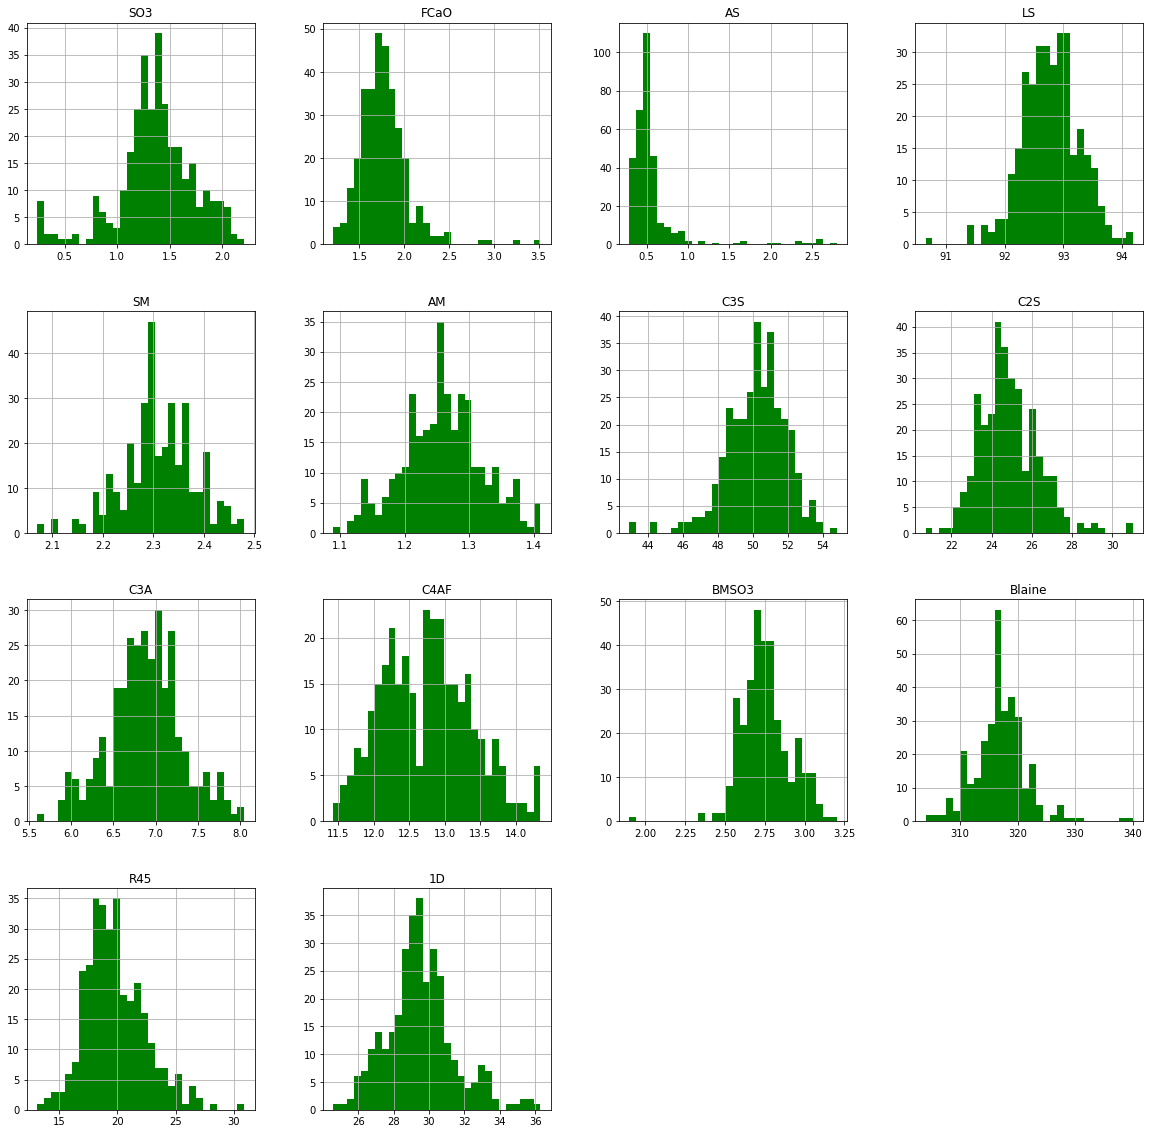

In [7]:
# Histogram of all
clk_reg.hist(bins = 30, figsize = (20,20), color = 'g');

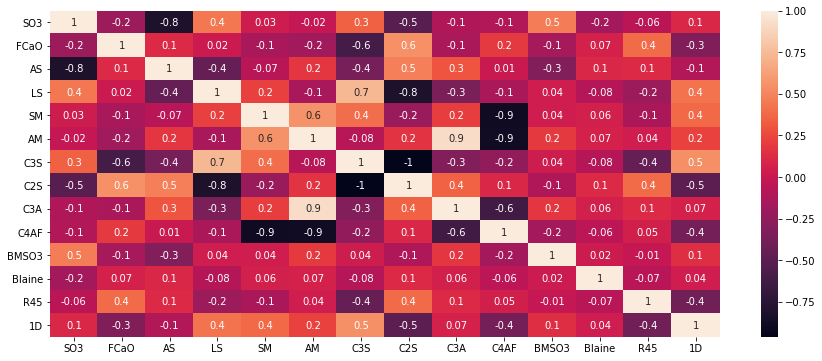

In [8]:
plt.figure(figsize = (15, 6))
sns.heatmap(clk_reg.corr(), annot = True, fmt='.1g')

In [9]:
corr_matrix = clk_reg.corr()

In [10]:
print(corr_matrix["1D"].sort_values(ascending=False))

1D        1.000000
C3S       0.542852
LS        0.419537
SM        0.384807
AM        0.231816
BMSO3     0.141348
SO3       0.108038
C3A       0.073265
Blaine    0.040551
AS       -0.095637
FCaO     -0.320723
C4AF     -0.378346
R45      -0.399322
C2S      -0.488527
Name: 1D, dtype: float64


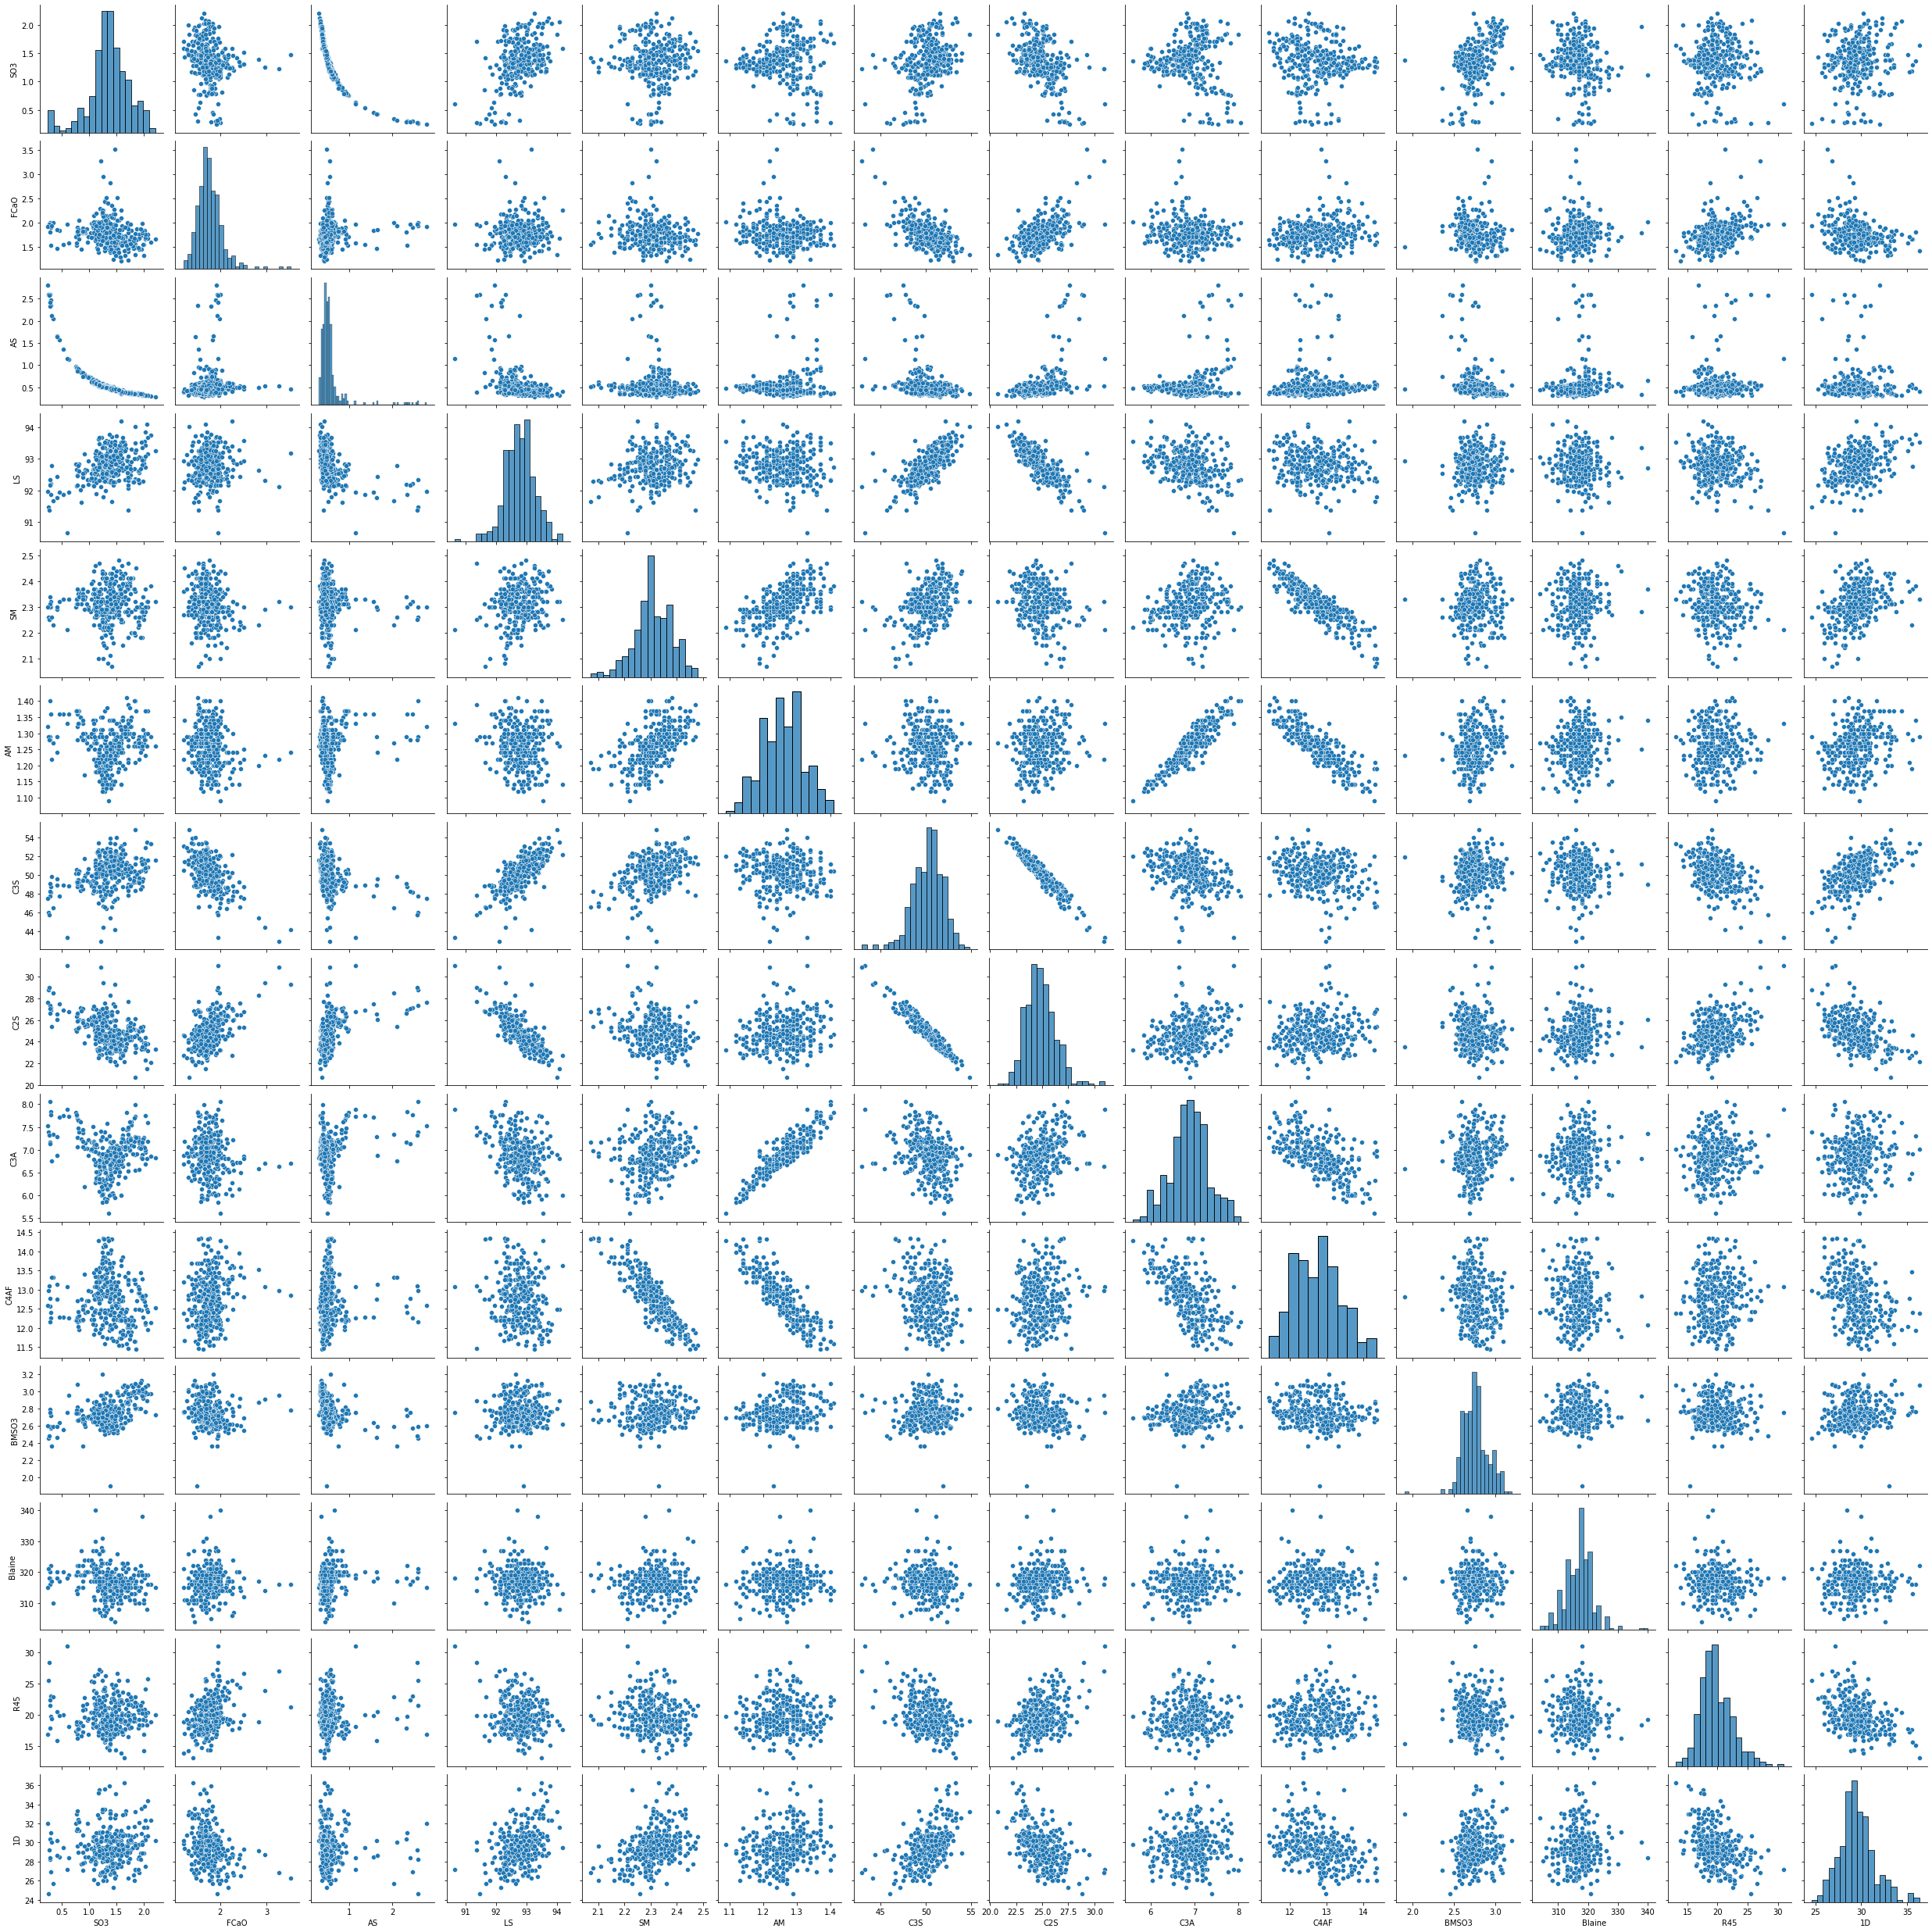

In [11]:
sns.pairplot(clk_reg);

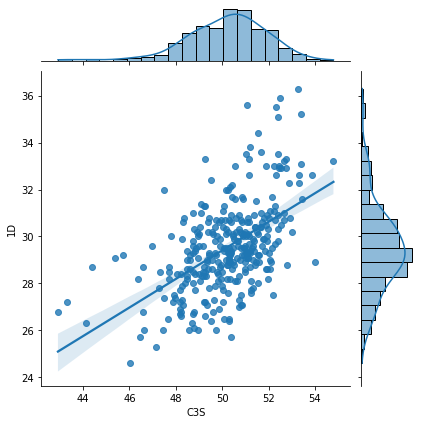

In [12]:
sns.jointplot( x = 'C3S', y = '1D', data = clk_reg, kind='reg');

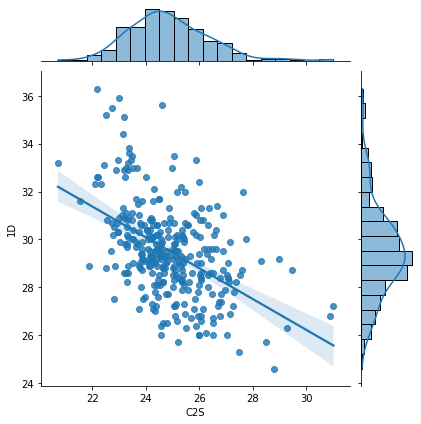

In [13]:
sns.jointplot( x = 'C2S', y = '1D', data = clk_reg, kind='reg');

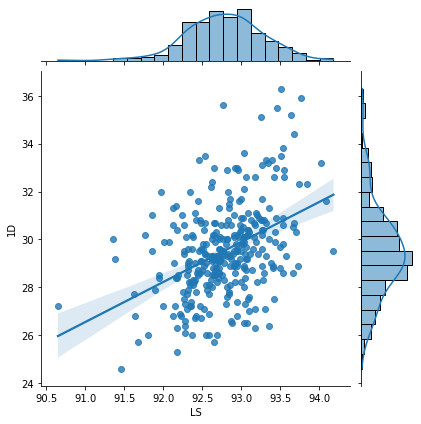

In [14]:
sns.jointplot( x = 'LS', y = '1D', data = clk_reg, kind='reg');

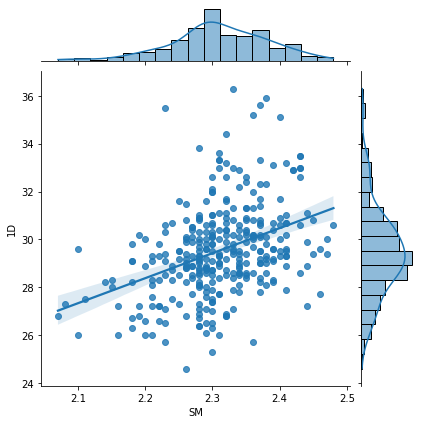

In [15]:
sns.jointplot( x = 'SM', y = '1D', data = clk_reg, kind='reg');

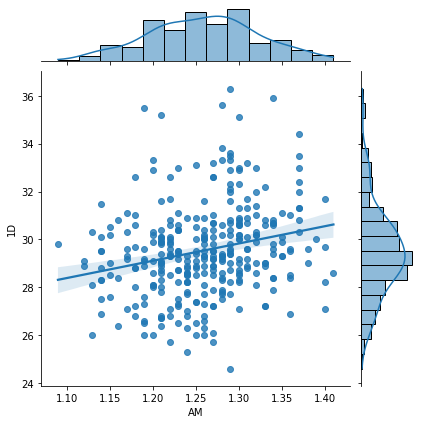

In [16]:
sns.jointplot( x = 'AM', y = '1D', data = clk_reg, kind='reg');

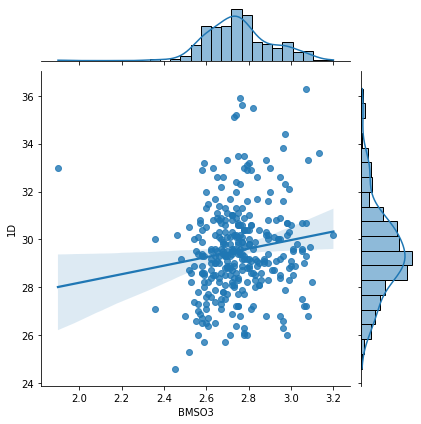

In [17]:
sns.jointplot( x = 'BMSO3', y = '1D', data = clk_reg, kind='reg');

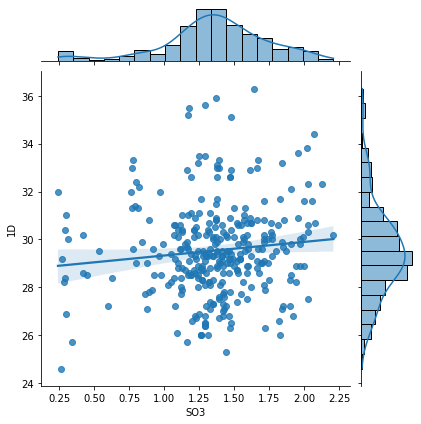

In [18]:
sns.jointplot( x = 'SO3', y = '1D', data = clk_reg, kind='reg');

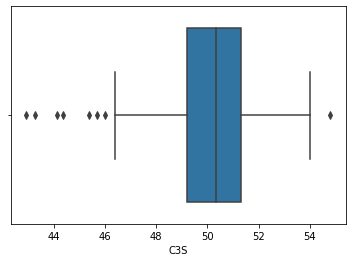

In [19]:
boxplot_C3S= sns.boxplot(data=clk_reg, x='C3S')

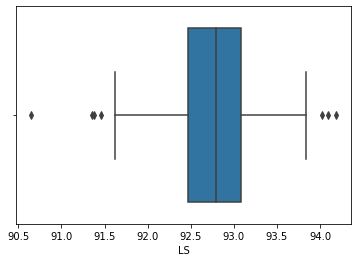

In [20]:
boxplot_LS= sns.boxplot(data=clk_reg, x='LS')

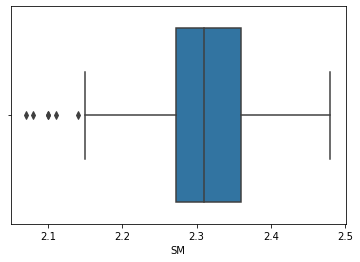

In [21]:
boxplot_SM= sns.boxplot(data=clk_reg, x='SM')

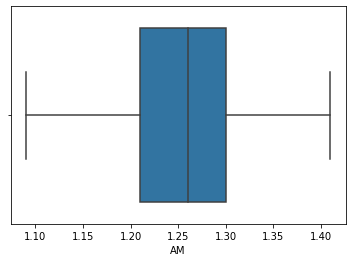

In [22]:
boxplot_AM= sns.boxplot(data=clk_reg, x='AM')

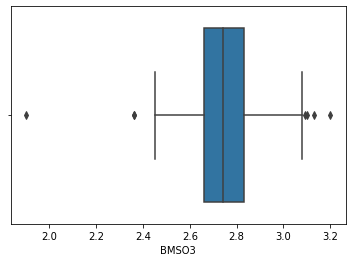

In [23]:
boxplot_BMSO3= sns.boxplot(data=clk_reg, x='BMSO3')

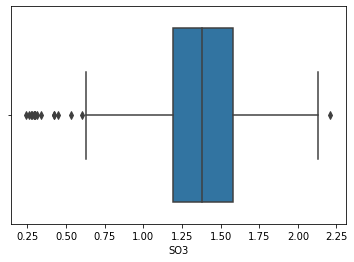

In [24]:
boxplot_SO3= sns.boxplot(data=clk_reg, x='SO3')

In [25]:
features = clk_reg[['C3S', 'LS', 'SM', 'AM', 'SO3', 'BMSO3', '1D']]
features

,C3S,LS,SM,AM,SO3,BMSO3,1D
0,48.83,91.94,2.33,1.36,0.63,2.95,28.4
1,48.75,92.48,2.33,1.36,0.78,2.82,29.6
2,49.20,92.84,2.36,1.37,0.81,2.77,31.3
3,49.50,92.63,2.35,1.37,0.80,2.74,32.4
4,50.15,92.83,2.30,1.37,0.76,2.74,32.0
...,...,...,...,...,...,...,...
317,50.61,93.25,2.36,1.30,1.66,2.63,30.8
318,52.65,93.67,2.39,1.34,1.62,2.57,30.7
319,50.06,92.71,2.35,1.31,1.58,2.69,31.3
320,49.43,92.62,2.28,1.27,1.54,2.80,29.2


In [26]:
#z_scores = stats.zscore(df)
#calculate z-scores of `df`

#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#new_df = df[filtered_entries]

#print(new_df)

In [27]:
from scipy import stats

In [28]:
z_scores = stats.zscore(features)
abs_z_scores = np.abs(z_scores)
filtered_features = (abs_z_scores < 3).all(axis=1)
new_features = features[filtered_features]
print(new_features)

       C3S     LS    SM    AM   SO3  BMSO3    1D
0    48.83  91.94  2.33  1.36  0.63   2.95  28.4
1    48.75  92.48  2.33  1.36  0.78   2.82  29.6
2    49.20  92.84  2.36  1.37  0.81   2.77  31.3
3    49.50  92.63  2.35  1.37  0.80   2.74  32.4
4    50.15  92.83  2.30  1.37  0.76   2.74  32.0
..     ...    ...   ...   ...   ...    ...   ...
317  50.61  93.25  2.36  1.30  1.66   2.63  30.8
318  52.65  93.67  2.39  1.34  1.62   2.57  30.7
319  50.06  92.71  2.35  1.31  1.58   2.69  31.3
320  49.43  92.62  2.28  1.27  1.54   2.80  29.2
321  50.03  92.30  2.27  1.26  1.55   2.75  27.7

[309 rows x 7 columns]


In [29]:
features.shape

(322, 7)

In [30]:
new_features.shape

(309, 7)

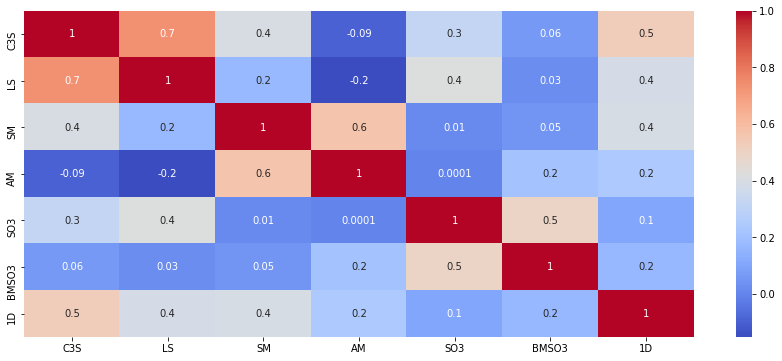

In [31]:
plt.figure(figsize = (15, 6))
sns.heatmap(new_features.corr(), annot = True, fmt='.1g', cmap='coolwarm');

In [32]:
corr_matrix_new_features = new_features.corr()
print(corr_matrix_new_features["1D"].sort_values(ascending=False))

1D       1.000000
C3S      0.523531
SM       0.392611
LS       0.387401
AM       0.243295
BMSO3    0.170987
SO3      0.101190
Name: 1D, dtype: float64


In [33]:
X = new_features[['C3S', 'LS', 'SM', 'AM', 'SO3', 'BMSO3']]

In [34]:
y = new_features['1D']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [36]:
X_train

,C3S,LS,SM,AM,SO3,BMSO3
60,50.49,92.72,2.29,1.26,1.35,2.54
107,46.58,92.44,2.24,1.21,1.28,2.92
171,48.75,93.57,2.22,1.22,1.31,2.69
279,50.34,92.63,2.41,1.35,1.62,2.96
188,51.34,92.84,2.37,1.21,1.43,2.68
...,...,...,...,...,...,...
204,52.74,93.39,2.37,1.20,1.39,2.70
36,50.37,92.99,2.35,1.31,1.22,2.67
251,50.18,92.98,2.30,1.20,1.13,2.88
248,49.69,93.26,2.27,1.21,1.13,2.85


In [37]:
X_test

,C3S,LS,SM,AM,SO3,BMSO3
225,53.89,93.42,2.43,1.27,1.38,2.95
210,52.46,92.95,2.43,1.30,1.39,2.90
182,50.49,92.90,2.24,1.12,1.24,2.70
5,50.55,92.65,2.31,1.37,0.77,2.78
321,50.03,92.30,2.27,1.26,1.55,2.75
...,...,...,...,...,...,...
305,51.95,92.81,2.31,1.21,1.40,2.80
103,49.57,92.43,2.29,1.24,0.42,2.59
143,49.74,92.65,2.24,1.31,1.62,3.05
198,52.00,92.73,2.41,1.28,1.28,2.69


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
regressor = LinearRegression(fit_intercept = True)

In [40]:
regressor = LinearRegression(fit_intercept= True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print('Linear Model Coefficients (m)', regressor.coef_)
print('Linear Model Coefficients (b)', regressor.intercept_)

Linear Model Coefficients (m) [ 0.53180498  0.63664847  0.87545134  6.69763332 -0.7940008   1.99257719]
Linear Model Coefficients (b) -71.2732919094833


In [42]:
y_predict = regressor.predict(X_test)
y_predict

array([32.277101  , 31.31075522, 28.57994191, 30.72096457, 28.77074336,
       28.00697741, 30.1981876 , 28.72977438, 29.37892898, 28.57575432,
       28.91592371, 29.11848867, 30.6015035 , 28.58797212, 31.04401583,
       29.58998697, 28.80639609, 29.35051883, 28.98074356, 31.41623363,
       29.947015  , 29.63000059, 30.10489052, 30.54232171, 29.70425289,
       28.65552005, 29.18831561, 31.4353721 , 28.48544921, 30.02390933,
       30.12321818, 28.7899826 , 28.33187466, 29.07657344, 29.57813878,
       28.29332815, 29.05375787, 30.36493799, 31.10942365, 28.7521239 ,
       30.19518784, 29.85528626, 31.65222817, 28.41522397, 29.2538647 ,
       29.52260479, 31.00905022, 30.97452235, 28.83868759, 29.87928271,
       28.38037305, 29.45451309, 29.76681318, 30.75564451, 28.02332219,
       29.00206199, 29.79884687, 27.39739778, 28.91742432, 26.99765939,
       28.33313496, 28.85290112, 27.78856006, 26.62634688, 28.67295863,
       30.39949348, 28.15143073, 27.94825627, 28.03499442, 31.34

In [43]:
y_test

225    32.6
210    33.0
182    28.9
5      33.0
321    27.7
       ... 
305    30.0
103    28.6
143    30.7
198    29.3
265    28.9
Name: 1D, Length: 93, dtype: float64

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

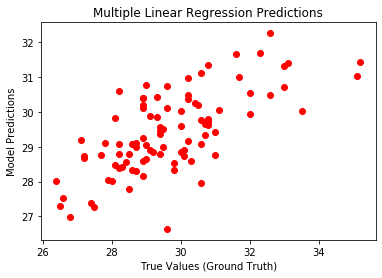

In [44]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

In [45]:
k = X_test.shape[1]
n = len(X_test)

In [46]:
n

93

In [47]:
k

6

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y_test-y_predict) / y_test  )  )*100

In [49]:
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

RMSE =  1.304 
MSE = 1.6997931380538551 
MAE = 0.9900079146759222 
R2 = 0.444412961646221 
Adjusted R2 = 0.40565107524944577 
MAPE = 3.274822775134484


In [50]:
regressor.score(X_train,y_train)

0.3628084492654169

In [51]:
regressor.score(X_test, y_test)

0.444412961646221